In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
y = df[['target']]
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [4]:
y = y.values

In [5]:
x = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
cols_to_norm = ['age','trestbps','chol','thalach','oldpeak']
x[cols_to_norm] = x[cols_to_norm].apply(lambda x: (x - x.mean(axis = 0)) / x.std(axis = 0))
x

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.950624,1,3,0.762694,-0.255910,1,0,0.015417,0,1.085542,0,0,1
1,-1.912150,1,2,-0.092585,0.072080,0,1,1.630774,0,2.119067,0,0,2
2,-1.471723,0,1,-0.092585,-0.815424,0,0,0.975900,0,0.310399,2,0,2
3,0.179877,1,1,-0.662770,-0.198030,0,1,1.237849,0,-0.206364,2,0,2
4,0.289984,0,0,-0.662770,2.078611,0,1,0.582975,1,-0.378618,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289984,0,0,0.477601,-0.101562,0,1,-1.163356,1,-0.723126,1,0,3
299,-1.031296,1,3,-1.232956,0.342190,0,1,-0.770432,0,0.138144,1,0,3
300,1.501157,1,0,0.705675,-1.027653,1,1,-0.377507,0,2.032940,1,2,3
301,0.289984,1,0,-0.092585,-2.223854,0,1,-1.512623,1,0.138144,1,1,3


In [7]:
x = x.values
x

array([[ 0.95062402,  1.        ,  3.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.91214969,  1.        ,  2.        , ...,  0.        ,
         0.        ,  2.        ],
       [-1.47172297,  0.        ,  1.        , ...,  2.        ,
         0.        ,  2.        ],
       ...,
       [ 1.50115743,  1.        ,  0.        , ...,  1.        ,
         2.        ,  3.        ],
       [ 0.28998393,  1.        ,  0.        , ...,  1.        ,
         1.        ,  3.        ],
       [ 0.28998393,  0.        ,  1.        , ...,  1.        ,
         1.        ,  2.        ]])

In [8]:
x_train, x_, y_train, y_ = train_test_split(x, y , test_size = 0.2, random_state = 50, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_, y_, test_size = 0.5, random_state = 50, stratify=y_)

In [9]:
input_layer = layers.Input(shape = (13,))

In [10]:
hypothesis = layers.Dense(1, activation='sigmoid')(input_layer)

In [11]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [12]:
model = keras.Model(inputs = input_layer, outputs = hypothesis)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


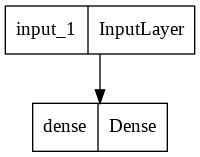

In [14]:
tf.keras.utils.plot_model(model)

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [16]:
history = model.fit(x=x_train, y=y_train, batch_size = 242, epochs = 100, callbacks = [earlystop], validation_data = (x_val, y_val))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.9657 - binary_accuracy: 0.3802 - val_loss: 0.8896 - val_binary_accuracy: 0.2581
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 0.7847 - binary_accuracy: 0.4752 - val_loss: 0.7116 - val_binary_accuracy: 0.7097
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6488 - binary_accuracy: 0.6322 - val_loss: 0.5885 - val_binary_accuracy: 0.7742
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 0.5551 - binary_accuracy: 0.7231 - val_loss: 0.5095 - val_binary_accuracy: 0.8387
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.4949 - binary_accuracy: 0.7521 - val_loss: 0.4599 - val_binary_accuracy: 0.8710
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 0.4574 - binary_accuracy: 0.7521 - val_loss: 0.4278 - val_binary_accuracy: 0.8710
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 0.4337

In [17]:
model.save('model.h5')

In [18]:
model.save_weights('weight.h5')

In [19]:
y_predicted = model.predict(x = x_val)

In [20]:
threshold_dict = {}
for i in range (1,100):
  y_pred = (y_predicted > (i/100)).astype(int)
  f1_val = f1_score(y_val, y_pred, average='macro')
  threshold_dict.update({(i/100) : f1_val})

In [21]:
threshold_dict

{0.01: 0.7479674796747967,
 0.02: 0.758082497212932,
 0.03: 0.8324324324324324,
 0.04: 0.8324324324324324,
 0.05: 0.8324324324324324,
 0.06: 0.8675213675213675,
 0.07: 0.8675213675213675,
 0.08: 0.8675213675213675,
 0.09: 0.8675213675213675,
 0.1: 0.8675213675213675,
 0.11: 0.8675213675213675,
 0.12: 0.8675213675213675,
 0.13: 0.8675213675213675,
 0.14: 0.8675213675213675,
 0.15: 0.8675213675213675,
 0.16: 0.8675213675213675,
 0.17: 0.8675213675213675,
 0.18: 0.8675213675213675,
 0.19: 0.8675213675213675,
 0.2: 0.9015873015873016,
 0.21: 0.9015873015873016,
 0.22: 0.9015873015873016,
 0.23: 0.9015873015873016,
 0.24: 0.9015873015873016,
 0.25: 0.9015873015873016,
 0.26: 0.9015873015873016,
 0.27: 0.9015873015873016,
 0.28: 0.9015873015873016,
 0.29: 0.9015873015873016,
 0.3: 0.9015873015873016,
 0.31: 0.9015873015873016,
 0.32: 0.9015873015873016,
 0.33: 0.9015873015873016,
 0.34: 0.9015873015873016,
 0.35: 0.9015873015873016,
 0.36: 0.9015873015873016,
 0.37: 0.9015873015873016,
 0.38

In [22]:
threshold = 0.01
f1_max = 0
for key,value in threshold_dict.items():
  if (value > f1_max):
    f1_max = value
    threshold = key

In [23]:
f1_max

0.9348739495798319

In [24]:
threshold

0.5

In [25]:
y_test_predicted = model.predict(x = x_test)
y_test_predicted = (y_test_predicted > threshold).astype(int)

In [26]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [27]:
model.get_weights()

[array([[ 0.03156865],
        [-1.8415614 ],
        [ 1.228669  ],
        [-0.459679  ],
        [-0.15417832],
        [-0.0229963 ],
        [ 0.7595045 ],
        [ 0.66025925],
        [-1.01017   ],
        [-0.82764107],
        [ 1.0694063 ],
        [-1.144806  ],
        [-0.8891133 ]], dtype=float32), array([1.3342294], dtype=float32)]